In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import rc
import seaborn as sns
rc('font',**{'family':'serif','serif':['Arial']})
plt.rcParams['pdf.fonttype'] = 42

In [2]:
TS_rpkm=pd.read_csv('2019-12-11_RNAseq/TS_rpkm.csv',index_col=0)
NTS_rpkm=pd.read_csv('2019-12-11_RNAseq/NTS_rpkm.csv',index_col=0)
joined=TS_rpkm.join(NTS_rpkm)

In [3]:
L187R_NTS=NTS_rpkm[(NTS_rpkm['bm02_NTS']/NTS_rpkm['bm01_NTS']>2) & (NTS_rpkm['bm02_NTS']/NTS_rpkm['bm01_NTS']<=4) ]
L187R_NTS2=NTS_rpkm[NTS_rpkm['bm02_NTS']/NTS_rpkm['bm01_NTS']>4]

In [39]:
L187R_NTS

bm01_NTS  bm02_NTS  bm03_NTS  bm04_NTS  bm05_NTS  bm06_NTS  \
Gene name                                                               
aaeB       0.151995  0.440346  1.629708  1.603285  0.803554  0.440519   
aat        0.212340  0.442923  0.403471  0.407239  0.164280  0.289606   
abgA       0.038038  0.105791  0.185852  0.175082  0.147141  0.077818   
abgB       0.137935  0.455559  0.870524  0.396812  0.747008  0.634928   
abgR       1.152436  3.624904  5.407376  1.768172  0.382113  0.392945   
...             ...       ...       ...       ...       ...       ...   
ytiA       0.775551  2.022166  2.052567  1.784881  0.750019  1.983292   
ytjA       0.309498  0.860781  1.512211  1.068434  0.239447  0.316588   
ytjC       0.693141  2.623920  6.397097  7.532984  1.370436  1.654378   
zipA       0.151610  0.351384  0.164615  0.174460  0.234590  0.155083   
zwf        0.135130  0.469782  0.660247  0.349867  0.209090  0.103669   

            bm07_NTS  bm08_NTS   bm09_NTS  bm10_NTS   bm11_NTS  bm12_NTS  
Gene name                                                                 
aaeB        3.492165  1.035073   2.167498  1.658221   1.649347  0.792721  
aat         1.910506  0.304424   0.946260  0.706748   1.112356  0.325719  
abgA        1.980093  0.190865   0.237311  0.211005   0.341591  0.245060  
abgB        2.426711  0.469663   0.676156  0.994719   1.316132  1.015612  
abgR        5.977997  3.068379   4.450895  2.009199   0.862443  0.707111  
...              ...       ...        ...       ...        ...       ...  
ytiA        4.485814  0.972893   1.555254  2.366216   1.523538  3.390518  
ytjA        2.088504  0.443715   0.275846  0.343375   1.389705  1.139409  
ytjC       54.791754  5.962382  10.914018  7.006552  12.362893  6.946521  
zipA        0.146153  0.398489   0.360334  0.336410   0.170189  0.232562  
zwf         1.074695  0.556976   0.662403  0.487244   0.492992  0.621847  

[1364 rows x 12 columns]

In [4]:
x=np.log2(NTS_rpkm['bm01_NTS'].tolist())
y=np.log2(NTS_rpkm['bm02_NTS'].tolist())

m=np.log2(L187R_NTS['bm01_NTS'].tolist())
z=np.log2(L187R_NTS['bm02_NTS'].tolist())

j=np.log2(L187R_NTS2['bm01_NTS'].tolist())
k=np.log2(L187R_NTS2['bm02_NTS'].tolist())

In [5]:
sns.set_style("whitegrid")

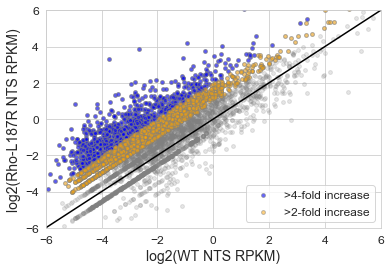

In [47]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x,y,c='grey',alpha=0.2,s=15)
#ax.scatter(m,z,alpha=0.8,c='orange',edgecolor='black',label='>2-fold increase',s=20)
ax.scatter(j,k,alpha=0.6,c='blue',edgecolor='grey',label='>4-fold transcription increase',s=15)
ax.scatter(m,z,alpha=0.5,c='orange',edgecolor='grey',label='>2-fold transcription increase',s=15)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
ax.plot([-6,6], [-6,6], 'k-', alpha=1)
ax.legend(fancybox=True,fontsize=12,loc=4)
ax.set_ylabel('log2(Rho-L187R NTS RPKM)',fontsize=14)
ax.set_xlabel('log2(WT NTS RPKM)',fontsize=14)
plt.ylim(-6,6)
plt.xlim(-6,6)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
#plt.savefig("L187R_NTS_rnaseq_2-4fold_2.png",bbox_inches='tight',transparent=True,dpi=600)

In [48]:
D210G_NTS=NTS_rpkm[(NTS_rpkm['bm06_NTS']/NTS_rpkm['bm01_NTS']>2) & (NTS_rpkm['bm06_NTS']/NTS_rpkm['bm01_NTS']<=4) ]
D210G_NTS2=NTS_rpkm[NTS_rpkm['bm06_NTS']/NTS_rpkm['bm01_NTS']>4]

In [49]:
x2=np.log2(NTS_rpkm['bm01_NTS'].tolist())
y2=np.log2(NTS_rpkm['bm06_NTS'].tolist())

m2=np.log2(D210G_NTS['bm01_NTS'].tolist())
z2=np.log2(D210G_NTS['bm06_NTS'].tolist())

j2=np.log2(D210G_NTS2['bm01_NTS'].tolist())
k2=np.log2(D210G_NTS2['bm06_NTS'].tolist())

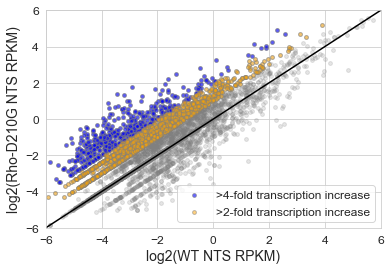

In [51]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x2,y2,c='grey',alpha=0.2,s=15)
#ax.scatter(m2,z2,alpha=0.7,c='orange',edgecolor='black',label='>2-fold increase',s=20)
ax.scatter(j2,k2,alpha=0.6,c='blue',edgecolor='grey',label='>4-fold transcription increase',s=15)
ax.scatter(m2,z2,alpha=0.5,c='orange',edgecolor='grey',label='>2-fold transcription increase',s=15)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
ax.plot([-6,6], [-6,6], 'k-', alpha=1)
ax.legend(fancybox=True,fontsize=12,loc=4)
ax.set_ylabel('log2(Rho-D210G NTS RPKM)',fontsize=14)
ax.set_xlabel('log2(WT NTS RPKM)',fontsize=14)
plt.ylim(-6,6)
plt.xlim(-6,6)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
#plt.savefig("D210G_NTS_rnaseq_2-4fold_2.png",bbox_inches='tight',transparent=True,dpi=600)

In [41]:
D210G_NTS2

bm01_NTS  bm02_NTS   bm03_NTS  bm04_NTS   bm05_NTS   bm06_NTS  \
Gene name                                                                  
aaeX       3.681955  4.949493   9.394829  7.908869  13.863157  15.316286   
abgB       0.137935  0.455559   0.870524  0.396812   0.747008   0.634928   
abpB       0.204871  1.820165   5.079160  3.981532   1.215175   1.071104   
actP       0.030218  0.189095   0.590579  0.347722   0.561081   0.401830   
ada        0.046832  0.097687   0.343232  0.269452   0.217393   0.239523   
...             ...       ...        ...       ...        ...        ...   
ytfI       0.159368  2.068445   7.137863  2.017267   0.575388   1.249812   
ytfQ       0.052123  0.217446   0.933796  0.299892   0.241952   0.373216   
zinT       0.153320  1.492463  13.484271  9.791788   0.652401   0.627330   
zraR       0.075214  0.313779   0.704367  0.432749   0.261856   0.346215   
zupT       0.322310  1.434265   4.619450  4.747368   1.845260   3.099118   

             bm07_NTS   bm08_NTS   bm09_NTS   bm10_NTS   bm11_NTS   bm12_NTS  
Gene name                                                                     
aaeX        11.358169   3.695077   8.969736  12.527273  18.737051  11.973617  
abgB         2.426711   0.469663   0.676156   0.994719   1.316132   1.015612  
abpB        27.912869   6.771777   9.251473   2.904336   3.986274   2.786451  
actP         2.738233   0.584849   0.996490   0.804610   0.644498   0.750911  
ada          0.993217   0.234994   0.125219   0.259790   0.630853   0.387924  
...               ...        ...        ...        ...        ...        ...  
ytfI        36.410772   4.264965  14.488066   2.770064   3.995400   2.737983  
ytfQ         2.411829   0.261541   0.418096   0.289139   0.585100   0.335804  
zinT       198.497835  11.924678  48.988893   2.041233  13.338491   3.316119  
zraR         1.848917   0.512198   0.837946   0.542403   0.379940   0.311510  
zupT        63.198182   3.511837   9.881907   2.002504  14.182896   8.068726  

[540 rows x 12 columns]

In [20]:
L187R_NTS

bm01_NTS  bm02_NTS  bm03_NTS  bm04_NTS  bm05_NTS  bm06_NTS  \
Gene name                                                               
aaeB       0.151995  0.440346  1.629708  1.603285  0.803554  0.440519   
aat        0.212340  0.442923  0.403471  0.407239  0.164280  0.289606   
abgA       0.038038  0.105791  0.185852  0.175082  0.147141  0.077818   
abgB       0.137935  0.455559  0.870524  0.396812  0.747008  0.634928   
abgR       1.152436  3.624904  5.407376  1.768172  0.382113  0.392945   
...             ...       ...       ...       ...       ...       ...   
znuB       0.444336  1.853696  3.773465  2.045223  1.276847  0.844099   
zraR       0.075214  0.313779  0.704367  0.432749  0.261856  0.346215   
zupT       0.322310  1.434265  4.619450  4.747368  1.845260  3.099118   
zur        0.870800  8.005685  8.036742  4.230861  0.973131  0.791776   
zwf        0.135130  0.469782  0.660247  0.349867  0.209090  0.103669   

            bm07_NTS   bm08_NTS   bm09_NTS  bm10_NTS   bm11_NTS  bm12_NTS  
Gene name                                                                  
aaeB        3.492165   1.035073   2.167498  1.658221   1.649347  0.792721  
aat         1.910506   0.304424   0.946260  0.706748   1.112356  0.325719  
abgA        1.980093   0.190865   0.237311  0.211005   0.341591  0.245060  
abgB        2.426711   0.469663   0.676156  0.994719   1.316132  1.015612  
abgR        5.977997   3.068379   4.450895  2.009199   0.862443  0.707111  
...              ...        ...        ...       ...        ...       ...  
znuB       17.562056   2.775623   7.071836  4.366332   2.778966  2.453721  
zraR        1.848917   0.512198   0.837946  0.542403   0.379940  0.311510  
zupT       63.198182   3.511837   9.881907  2.002504  14.182896  8.068726  
zur        46.636495  15.119922  16.298454  5.582013   5.756480  2.315323  
zwf         1.074695   0.556976   0.662403  0.487244   0.492992  0.621847  

[2213 rows x 12 columns]

In [66]:
L187R_NTS3=NTS_rpkm[NTS_rpkm['bm02_NTS']/NTS_rpkm['bm01_NTS']>2]

In [67]:
x3=np.log2(NTS_rpkm['bm01_NTS'].tolist())
y3=np.log2(NTS_rpkm['bm02_NTS'].tolist())

m3=np.log2(L187R_NTS3['bm01_NTS'].tolist())
z3=np.log2(L187R_NTS3['bm02_NTS'].tolist())

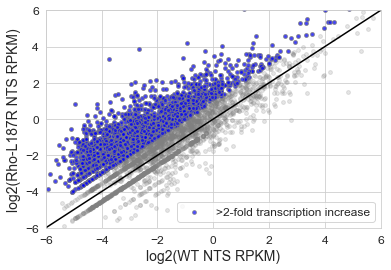

In [72]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x3,y3,c='grey',alpha=0.2,s=15)
ax.scatter(m3,z3,alpha=0.7,c='blue',edgecolor='grey',label='>2-fold transcription increase',s=15)
#ax.scatter(j2,k2,alpha=0.7,c='red',edgecolor='black',label='>4-fold increase')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
ax.plot([-6,6], [-6,6], 'k-', alpha=1)
ax.legend(fancybox=True,fontsize=12,loc=4)
ax.set_ylabel('log2(Rho-L187R NTS RPKM)',fontsize=14)
ax.set_xlabel('log2(WT NTS RPKM)',fontsize=14)
plt.ylim(-6,6)
plt.xlim(-6,6)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
#plt.savefig("L187R_NTS_rnaseq_2fold_2.png",bbox_inches='tight',transparent=True,dpi=600)

In [20]:
L187R_NTS3

bm01_NTS  bm02_NTS  bm03_NTS  bm04_NTS  bm05_NTS  bm06_NTS  \
Gene name                                                               
aaeB       0.151995  0.440346  1.629708  1.603285  0.803554  0.440519   
aat        0.212340  0.442923  0.403471  0.407239  0.164280  0.289606   
abgA       0.038038  0.105791  0.185852  0.175082  0.147141  0.077818   
abgB       0.137935  0.455559  0.870524  0.396812  0.747008  0.634928   
abgR       1.152436  3.624904  5.407376  1.768172  0.382113  0.392945   
...             ...       ...       ...       ...       ...       ...   
znuB       0.444336  1.853696  3.773465  2.045223  1.276847  0.844099   
zraR       0.075214  0.313779  0.704367  0.432749  0.261856  0.346215   
zupT       0.322310  1.434265  4.619450  4.747368  1.845260  3.099118   
zur        0.870800  8.005685  8.036742  4.230861  0.973131  0.791776   
zwf        0.135130  0.469782  0.660247  0.349867  0.209090  0.103669   

            bm07_NTS   bm08_NTS   bm09_NTS  bm10_NTS   bm11_NTS  bm12_NTS  
Gene name                                                                  
aaeB        3.492165   1.035073   2.167498  1.658221   1.649347  0.792721  
aat         1.910506   0.304424   0.946260  0.706748   1.112356  0.325719  
abgA        1.980093   0.190865   0.237311  0.211005   0.341591  0.245060  
abgB        2.426711   0.469663   0.676156  0.994719   1.316132  1.015612  
abgR        5.977997   3.068379   4.450895  2.009199   0.862443  0.707111  
...              ...        ...        ...       ...        ...       ...  
znuB       17.562056   2.775623   7.071836  4.366332   2.778966  2.453721  
zraR        1.848917   0.512198   0.837946  0.542403   0.379940  0.311510  
zupT       63.198182   3.511837   9.881907  2.002504  14.182896  8.068726  
zur        46.636495  15.119922  16.298454  5.582013   5.756480  2.315323  
zwf         1.074695   0.556976   0.662403  0.487244   0.492992  0.621847  

[2213 rows x 12 columns]

In [52]:
L187R_TS=TS_rpkm[(TS_rpkm['bm02_TS']/TS_rpkm['bm01_TS']>2) & (TS_rpkm['bm02_TS']/TS_rpkm['bm01_TS']<=4) ]
L187R_TS2=TS_rpkm[TS_rpkm['bm02_TS']/TS_rpkm['bm01_TS']>4]

In [53]:
x4=np.log2(TS_rpkm['bm01_TS'].tolist())
y4=np.log2(TS_rpkm['bm02_TS'].tolist())

m4=np.log2(L187R_TS['bm01_TS'].tolist())
z4=np.log2(L187R_TS['bm02_TS'].tolist())

j4=np.log2(L187R_TS2['bm01_TS'].tolist())
k4=np.log2(L187R_TS2['bm02_TS'].tolist())

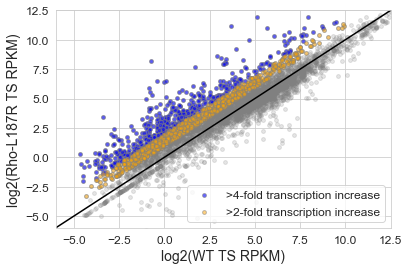

In [69]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x4,y4,c='grey',alpha=0.2,s=15)
#ax.scatter(m4,z4,alpha=0.7,c='orange',edgecolor='black',label='>2-fold increase',s=20)
ax.scatter(j4,k4,alpha=0.6,c='blue',edgecolor='grey',label='>4-fold transcription increase',s=15)
ax.scatter(m4,z4,alpha=0.5,c='orange',edgecolor='grey',label='>2-fold transcription increase',s=15)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
ax.plot([-6,12.5], [-6,12.5], 'k-', alpha=1)
ax.legend(fancybox=True,fontsize=12,loc=4)
ax.set_ylabel('log2(Rho-L187R TS RPKM)',fontsize=14)
ax.set_xlabel('log2(WT TS RPKM)',fontsize=14)
plt.ylim(-6,12.5)
plt.xlim(-6,12.5)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
#plt.savefig("L187R_TS_rnaseq_2-4fold_2.png",bbox_inches='tight',transparent=True,dpi=600)

In [61]:
D210G_TS=TS_rpkm[(TS_rpkm['bm06_TS']/TS_rpkm['bm01_TS']>2) & (TS_rpkm['bm06_TS']/TS_rpkm['bm01_TS']<=4) ]
D210G_TS2=TS_rpkm[TS_rpkm['bm06_TS']/TS_rpkm['bm01_TS']>4]

In [62]:
x5=np.log2(TS_rpkm['bm01_TS'].tolist())
y5=np.log2(TS_rpkm['bm06_TS'].tolist())

m5=np.log2(D210G_TS['bm01_TS'].tolist())
z5=np.log2(D210G_TS['bm06_TS'].tolist())

j5=np.log2(D210G_TS2['bm01_TS'].tolist())
k5=np.log2(D210G_TS2['bm06_TS'].tolist())

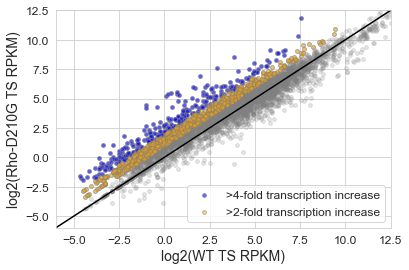

In [70]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x5,y5,c='grey',alpha=0.2,s=15)
ax.scatter(j5,k5,alpha=0.6,c='blue',edgecolor='grey',label='>4-fold transcription increase',s=15)
ax.scatter(m5,z5,alpha=0.5,c='orange',edgecolor='grey',label='>2-fold transcription increase',s=15)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
ax.plot([-6,12.5], [-6,12.5], 'k-', alpha=1)
ax.legend(fancybox=True,fontsize=12,loc=4)
ax.set_ylabel('log2(Rho-D210G TS RPKM)',fontsize=14)
ax.set_xlabel('log2(WT TS RPKM)',fontsize=14)
plt.ylim(-6,12.5)
plt.xlim(-6,12.5)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
#plt.savefig("D210G_TS_rnaseq_2-4fold_2.png",bbox_inches='tight',transparent=True,dpi=600)

In [3]:
NTS_rpkm

bm01_NTS  bm02_NTS   bm03_NTS   bm04_NTS   bm05_NTS   bm06_NTS  \
Gene name                                                                   
aaeA       0.801971  0.929358   1.480301   1.230457   2.812732   1.640684   
aaeB       0.151995  0.440346   1.629708   1.603285   0.803554   0.440519   
aaeR       2.467320  2.834371  11.138111  12.838078   7.718494   4.937948   
aaeX       3.681955  4.949493   9.394829   7.908869  13.863157  15.316286   
aas        0.207718  0.320949   0.808170   0.929539   0.892797   0.779078   
...             ...       ...        ...        ...        ...        ...   
zraR       0.075214  0.313779   0.704367   0.432749   0.261856   0.346215   
zraS       0.107006  0.198405   0.755204   0.246268   0.331146   0.291886   
zupT       0.322310  1.434265   4.619450   4.747368   1.845260   3.099118   
zur        0.870800  8.005685   8.036742   4.230861   0.973131   0.791776   
zwf        0.135130  0.469782   0.660247   0.349867   0.209090   0.103669   

            bm07_NTS   bm08_NTS   bm09_NTS   bm10_NTS   bm11_NTS   bm12_NTS  
Gene name                                                                    
aaeA        2.989339   0.613203   1.572497   1.423607   2.400670   1.968292  
aaeB        3.492165   1.035073   2.167498   1.658221   1.649347   0.792721  
aaeR       65.202237   4.344732  19.408955  16.721890  20.893063  12.094723  
aaeX       11.358169   3.695077   8.969736  12.527273  18.737051  11.973617  
aas         3.537591   0.397063   0.822809   0.870605   1.139957   1.125820  
...              ...        ...        ...        ...        ...        ...  
zraR        1.848917   0.512198   0.837946   0.542403   0.379940   0.311510  
zraS        1.581702   0.153411   0.540436   0.751886   0.600597   0.295455  
zupT       63.198182   3.511837   9.881907   2.002504  14.182896   8.068726  
zur        46.636495  15.119922  16.298454   5.582013   5.756480   2.315323  
zwf         1.074695   0.556976   0.662403   0.487244   0.492992   0.621847  

[4419 rows x 12 columns]